In [269]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')


In [270]:
#Importing CSV
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv' #link til TSLA datasett
df=pd.read_csv(url, sep=",")

In [271]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [272]:
#String to Datetime
#df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
#df['Date']

#string to float
#df['Date']=pd.to_numeric(df['Date'],downcast='float')


In [273]:
#string to float days
df['Date']=pd.to_datetime(df['Date'])
df['Date']=(df['Date']-df['Date'].min()) /np.timedelta64(1,'D')


In [274]:
df.dtypes

Date         float64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [275]:
print(df['Date'])

0          0.0
1          1.0
2          2.0
3          3.0
4          7.0
         ...  
2840    4119.0
2841    4122.0
2842    4123.0
2843    4124.0
2844    4125.0
Name: Date, Length: 2845, dtype: float64


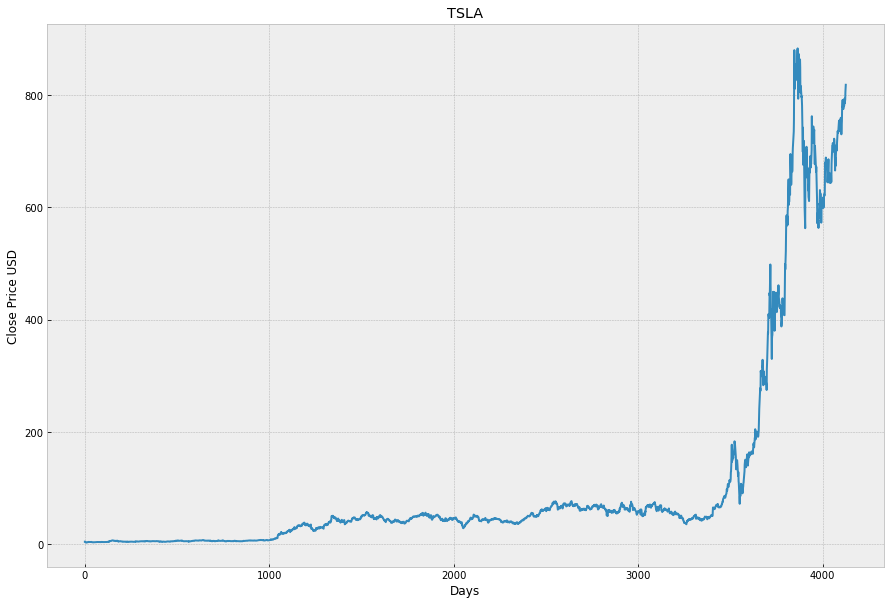

In [276]:
#Plot of TSLA
plt.figure(figsize=(15,10))
plt.title("TSLA")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Date'],df['Close'])
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Close'>

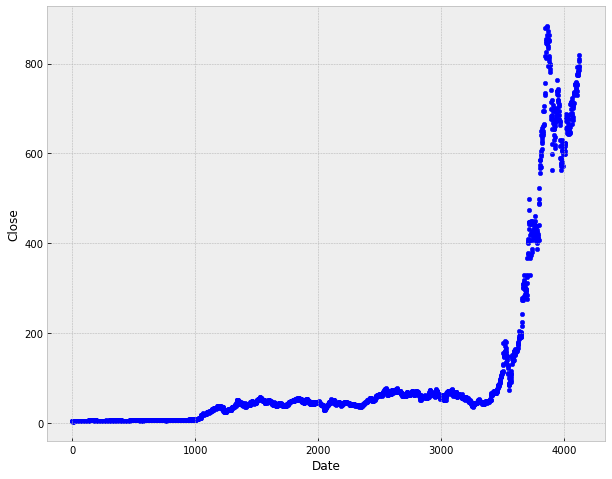

In [277]:
# Scatter-Plot of TSLA over time in days
df.plot.scatter(x='Date',y='Close',figsize=(10,8))

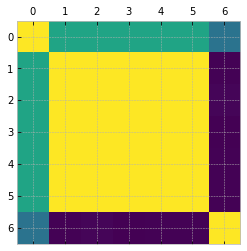

In [278]:
plt.matshow(df.corr())
plt.show()

In [279]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.641076,0.641735,0.640634,0.641184,0.641184,0.466259
Open,0.641076,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
High,0.641735,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
Low,0.640634,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Adj Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Volume,0.466259,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


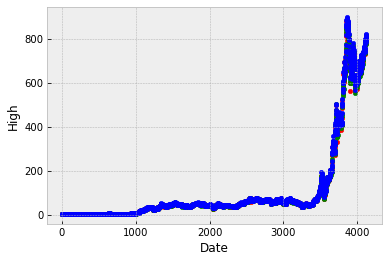

In [280]:
ax1=df.plot(kind='scatter',x='Date',y='Close',color='r')
ax2=df.plot(kind='scatter',x='Date',y='Open',color='g',ax=ax1)
ax3=df.plot(kind='scatter',x='Date',y='High',color='b',ax=ax1)

In [281]:
x=df.values
scaler=preprocessing.MinMaxScaler().fit(x)
x=scaler.transform(x)
df=pd.DataFrame(x)


In [282]:
df.head()

,0,1,2,3,4,5,6
0,0.000000,0.000644,0.001866,0.000589,0.001839,0.001839,0.306605
1,0.000242,0.002173,0.003074,0.001916,0.001825,0.001825,0.280640
2,0.000485,0.001995,0.002071,0.001218,0.001400,0.001400,0.133184
3,0.000727,0.001545,0.001442,0.000859,0.000773,0.000773,0.082560
4,0.001697,0.000869,0.000751,0.000196,0.000070,0.000070,0.110956


In [283]:
#SCALING 0-1
x=df.values
x=scaler.inverse_transform(x)
df2=pd.DataFrame(x)
df2.head()

,0,1,2,3,4,5,6
0,0.0,3.800,5.000,3.508,4.778,4.778,93831500.0
1,1.0,5.158,6.084,4.660,4.766,4.766,85935500.0
2,2.0,5.000,5.184,4.054,4.392,4.392,41094000.0
3,3.0,4.600,4.620,3.742,3.840,3.840,25699000.0
4,7.0,4.000,4.000,3.166,3.222,3.222,34334500.0


In [284]:
#Showing corr matrix is same at df and df2
corr=df2.corr()
corr.style.background_gradient(cmap='plasma')

,0,1,2,3,4,5,6
0,1.000000,0.641076,0.641735,0.640634,0.641184,0.641184,0.466259
1,0.641076,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
2,0.641735,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
3,0.640634,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
4,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
5,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
6,0.466259,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


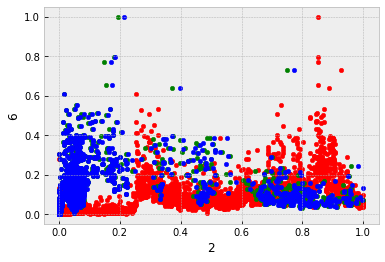

In [285]:
ax1=df.plot(kind='scatter',x=0,y=6,color='r')
ax2=df.plot(kind='scatter',x=1,y=6,color='g',ax=ax1)
ax3=df.plot(kind='scatter',x=2,y=6,color='b',ax=ax1)

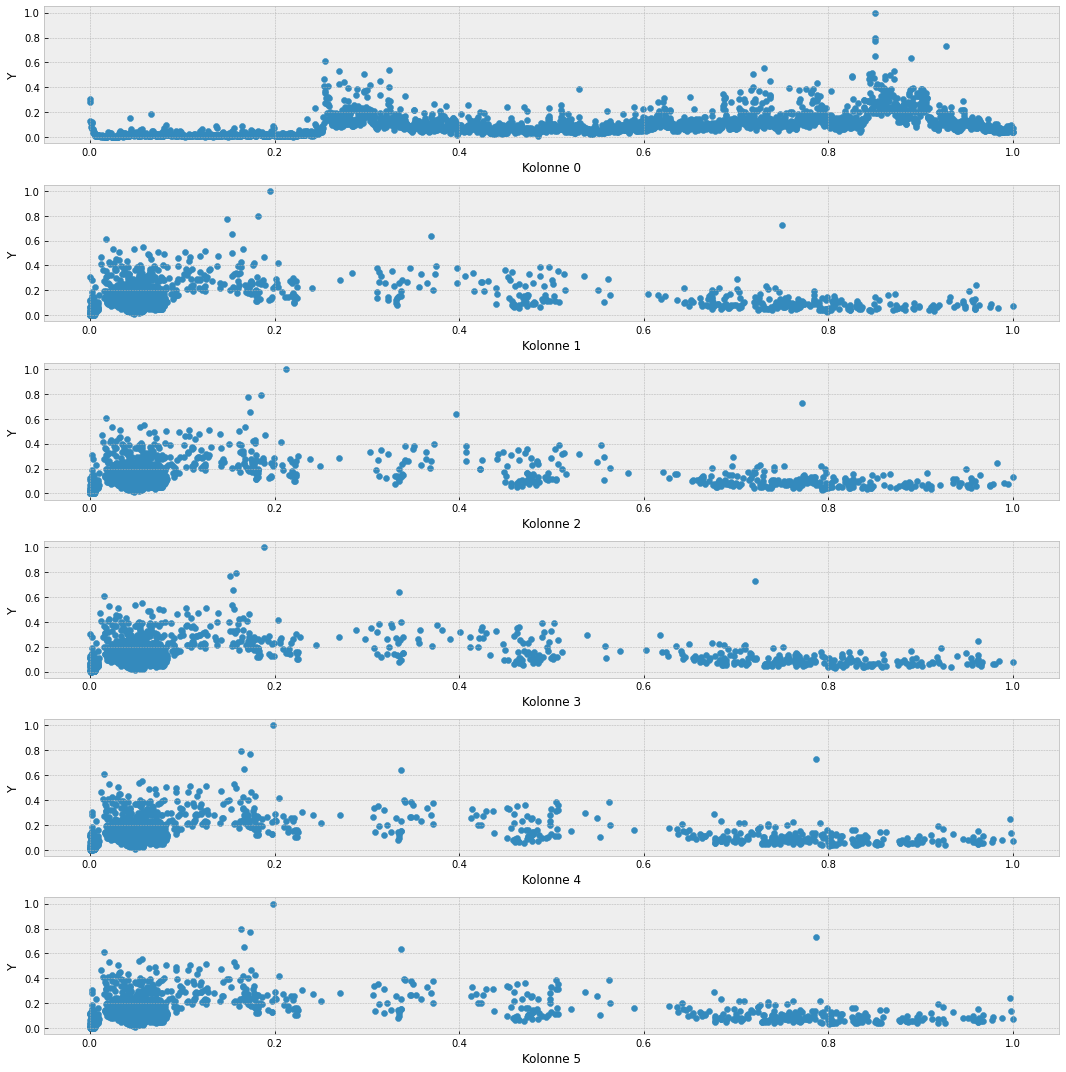

In [286]:
#scatterplot all columns
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 15)) #Figsize ( lenght, height )
for i in range(df.shape[1]-1):  
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel("Kolonne " + str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()


In [287]:
#Scaling
x=df.values
x=scaler.inverse_transform(x)
df=pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,0.0,3.800,5.000,3.508,4.778,4.778,93831500.0
1,1.0,5.158,6.084,4.660,4.766,4.766,85935500.0
2,2.0,5.000,5.184,4.054,4.392,4.392,41094000.0
3,3.0,4.600,4.620,3.742,3.840,3.840,25699000.0
4,7.0,4.000,4.000,3.166,3.222,3.222,34334500.0


In [288]:
#Extract 'Close'  and 'Date'
X=pd.DataFrame(df[0]) #Close
y=pd.DataFrame(df[4]) #Date

In [289]:
#split 33% test and 44% random
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [290]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

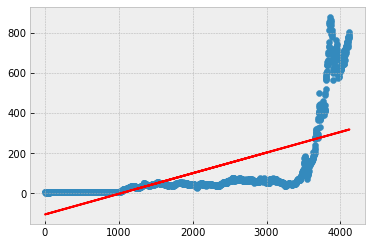

MSE = 21095.046555767265


In [291]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

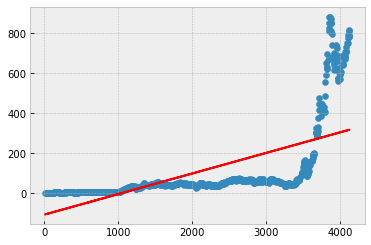

MSE = 20758.462005721703


In [292]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

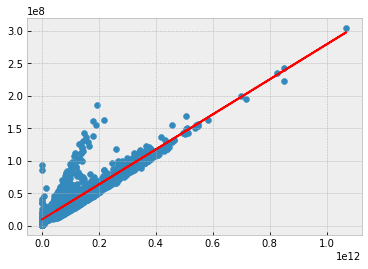

MSE = 148210261677602.12


In [293]:
df[7] = df[0]*df[6]

X = pd.DataFrame(df[7])
Y = pd.DataFrame(df[6])
#linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))